## Diagnostic Metrics

**Objectives:**

At the end of this ICE, you will be able to:

- identify the correct model diagnostic metric(s) for performance

- implement at least one model diagnostic metric for a model you have built for ACA2 or ACA3

### Classification

For ACA2

Import Data and Clean Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# read the training data
data = pd.read_csv("aca2_dataset_training.csv")
data

,UNIQUEID,SCHOOL,Class,GRADE,CODER,STUDENTID,Gender,OBSNUM,totalobs-forsession,Activity,ONTASK,TRANSITIONS,NumACTIVITIES,FORMATchanges,NumFORMATS,Obsv/act,Transitions/Durations,Total Time
0,34880,A,T8T,2,Z,965160,1,12,224,Wholecarpet,Y,1,2,1,2,1390.500000,0.000664,1027
1,32344,B,T9U,3,Z,11665,1,11,225,Individual,Y,2,3,2,3,890.333333,0.002545,213
2,14774,B,T9Q,0,Z,187441,0,21,374,Smallgroup,Y,3,4,1,2,770.500000,0.001439,2078
3,19468,A,T8S,1,Z,402837,0,17,320,Wholedesks,Y,5,6,0,1,592.333333,0.001407,3229
4,31570,B,T9T,2,Z,300647,1,2,35,Wholedesks,Y,2,3,1,2,870.000000,0.005882,260
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22179,30762,B,T9Q,0,Z,749212,1,5,95,Wholecarpet,Y,2,3,2,3,969.000000,0.002959,652
22180,14611,B,T9Q,0,Z,87701,0,12,211,Smallgroup,N,3,4,1,2,770.500000,0.001439,708
22181,20432,A,T8VQ,4,Z,130859,0,6,95,Smallgroup,N,1,2,0,1,1060.000000,0.000472,362
22182,38264,E,T6Q,0,Y,874565,1,10,147,Wholedesks,Y,1,2,1,2,1204.500000,0.000838,60


In [3]:
# create a dummy variable for ONTASK
dummyONTASK = pd.get_dummies(data['ONTASK'], prefix = 'ONTASK') 
data = pd.concat([data, dummyONTASK], axis=1)
data = data.drop(['ONTASK', 'ONTASK_N'], axis=1)
# data

In [4]:
# create a dummy variable for CODER
dummyCODER = pd.get_dummies(data['CODER'], prefix = 'CODER') 
data = pd.concat([data, dummyCODER], axis=1)
data = data.drop(['CODER', 'CODER_Y'], axis=1)
# data

In [5]:
# convert Activity to a category, then use those category values for label encoding
data['Activity'] = data['Activity'].astype('category')
# assign the encoded variable to a new column using the cat.codes accessor
data["Activity_cat"] = data["Activity"].cat.codes
data = data.drop(['Activity'], axis=1)

In [6]:
# convert SCHOOL to a category, then use those category values for label encoding
data['SCHOOL'] = data['SCHOOL'].astype('category')
# assign the encoded variable to a new column using the cat.codes accessor
data["SCHOOL_cat"] = data["SCHOOL"].cat.codes
data = data.drop(['SCHOOL'], axis=1)

In [7]:
# convert Class to a category, then use those category values for label encoding
data['Class'] = data['Class'].astype('category')
# assign the encoded variable to a new column using the cat.codes accessor
data["Class_cat"] = data["Class"].cat.codes
data = data.drop(['Class'], axis=1)

In [16]:
# Feature Selection with Sci-Kit:
# RECURSIVE FEATURE ELIMINATION
# Feature ranking with recursive feature elimination 

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

X = data.drop(['ONTASK_Y'], axis=1)   # drop the ONTASK_Y column
y = data['ONTASK_Y']
names=pd.DataFrame(X.columns)

# use logistic regression as the model
logit_reg = LogisticRegression(max_iter=2000)

# This is to select 8 variables: can be changed and checked in model for accuracy
rfe_mod = RFE(logit_reg, 8, step=1) 
myvalues=rfe_mod.fit(X,y)  # to fit
myvalues.support_   # The mask of selected features
myvalues.ranking_   # The feature ranking, such that ranking_[i] corresponds to the ranking position of the i-th feature. Selected (i.e., estimated best) features are assigned rank 1

rankings=pd.DataFrame(myvalues.ranking_) # Make it into data frame
rankings

TypeError: __init__() takes 2 positional arguments but 3 positional arguments (and 1 keyword-only argument) were given

In [9]:
# Concat and name columns
ranked=pd.concat([names,rankings], axis=1)
ranked.columns = ["Feature", "Rank"]
ranked

# Select most important (Only 1's)
most_important = ranked.loc[ranked['Rank'] ==1] 
print(most_important)

most_important['Rank'].count()

NameError: name 'rankings' is not defined

In [10]:
# read the validation data
testData = pd.read_csv("aca2_dataset_validation.csv")

In [11]:
# create a dummy variable for ONTASK
dummyONTASK2 = pd.get_dummies(testData['ONTASK'], prefix = 'ONTASK') 
testData = pd.concat([testData, dummyONTASK2], axis=1)
testData = testData.drop(['ONTASK', 'ONTASK_N'], axis=1)

In [12]:
# create a dummy variable for CODER
dummyCODER2 = pd.get_dummies(testData['CODER'], prefix = 'CODER') 
testData = pd.concat([testData, dummyCODER2], axis=1)
testData = testData.drop(['CODER', 'CODER_Y'], axis=1)

In [13]:
# convert Activity to a category, then use those category values for label encoding
testData['Activity'] = testData['Activity'].astype('category')
# assign the encoded variable to a new column using the cat.codes accessor
testData["Activity_cat"] = testData["Activity"].cat.codes
testData = testData.drop(['Activity'], axis=1)

In [14]:
# convert SCHOOL to a category, then use those category values for label encoding
testData['SCHOOL'] = testData['SCHOOL'].astype('category')
# assign the encoded variable to a new column using the cat.codes accessor
testData["SCHOOL_cat"] = testData["SCHOOL"].cat.codes
testData = testData.drop(['SCHOOL'], axis=1)

In [15]:
# convert Class to a category, then use those category values for label encoding
testData['Class'] = testData['Class'].astype('category')
# assign the encoded variable to a new column using the cat.codes accessor
testData["Class_cat"] = testData["Class"].cat.codes
testData = testData.drop(['Class'], axis=1)

#### Our Classifier (Logistic Regression)

In [17]:
# create an array of X_train, and an arrary for the training labels y_train
X_train1 = data[['GRADE','Gender','TRANSITIONS','NumACTIVITIES','FORMATchanges','NumFORMATS','CODER_Z','SCHOOL_cat']].to_numpy()
X_train2 = data[['GRADE','Gender','TRANSITIONS','NumACTIVITIES','FORMATchanges','NumFORMATS','Activity_cat','Class_cat']].to_numpy()
y_train = y.values.reshape(-1, 1)

In [18]:
# Then loading LogisticRegression() and calling for LogisticRegression.fit() 
LogitModel1 = LogisticRegression(max_iter=2000)
LogitModel2 = LogisticRegression(max_iter=2000)
LogitModel1.fit(X_train1, y_train)
LogitModel2.fit(X_train2, y_train)

/Users/shirley/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/shirley/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(max_iter=2000)

In [19]:
# call for the intercept and coefficients of each parameter and we will have our logistic regression model
print(LogitModel1.intercept_)
print(LogitModel2.intercept_)

[0.53711626]
[0.37074765]


In [20]:
print(LogitModel1.coef_)
print(LogitModel2.coef_)

[[-0.06594436  0.21193494 -0.22245707  0.31112433 -0.30177774  0.23180366
  -0.28806582 -0.08431776]]
[[-0.06780771  0.20101363 -0.14055238  0.22954067 -0.22229562  0.14779743
  -0.03125909  0.00205829]]


#### Model Performance using Confusion Matrix

In [21]:
# create an array of X_test, and an arrary for the training labels y_test
X_test1 = testData[['GRADE','Gender','TRANSITIONS','NumACTIVITIES','FORMATchanges','NumFORMATS','CODER_Z','SCHOOL_cat']].to_numpy()
X_test2 = testData[['GRADE','Gender','TRANSITIONS','NumACTIVITIES','FORMATchanges','NumFORMATS','Activity_cat','Class_cat']].to_numpy()
y_test = testData['ONTASK_Y'].values.reshape(-1, 1)

In [22]:
# Feed the X_train in the testing dataset and obtain the predicted Ys
# Predicted value in sklearn logistic regression model
y_pred1 = LogitModel1.predict(X_test1)
y_pred2 = LogitModel2.predict(X_test2)

In [23]:
# Compare the predicted Ys with what is actually in the testing dataset and obtain the confusion matrix.
from sklearn.metrics import confusion_matrix

# sklearn logistic regression model confusion matrix
print(confusion_matrix(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred2))

[[   0 1849]
 [   0 3698]]
[[   0 1849]
 [   0 3698]]


In [24]:
# Obtaining accuracy scores
from sklearn.metrics import accuracy_score
ac_logit1 = accuracy_score(y_test, y_pred1)
print("The accuracy for logistic regression 1 in sklearn is", ac_logit1*100, "%")
ac_logit2 = accuracy_score(y_test, y_pred2)
print("The accuracy for logistic regression 2 in sklearn is", ac_logit2*100, "%")

The accuracy for logistic regression 1 in sklearn is 66.66666666666666 %
The accuracy for logistic regression 2 in sklearn is 66.66666666666666 %


When taking Feature Set 1 variables, we got 66.66% accuracy using logistic regression

### Clustering

For ACA3

Import Data and Clean Data

In [25]:
# Import the packages
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [26]:
# Import data
data = pd.read_csv("CollegeScorecard.csv")
data

/Users/shirley/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (7,9,1427,1542,1561,1575) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,UNITID,OPEID,opeid6,INSTNM,CITY,STABBR,ZIP,AccredAgency,INSTURL,NPCURL,...,COMPL_RPY_3YR_RT_SUPP,NONCOM_RPY_3YR_RT_SUPP,DEP_RPY_3YR_RT_SUPP,IND_RPY_3YR_RT_SUPP,PELL_RPY_3YR_RT_SUPP,NOPELL_RPY_3YR_RT_SUPP,FEMALE_RPY_3YR_RT_SUPP,MALE_RPY_3YR_RT_SUPP,FIRSTGEN_RPY_3YR_RT_SUPP,NOTFIRSTGEN_RPY_3YR_RT_SUPP
0,100654,100200,1002,Alabama A & M University,Normal,AL,35762,Southern Association of Colleges and Schools C...,www.aamu.edu/,galileo.aamu.edu/netpricecalculator/npcalc.htm,...,0.578873239,0.373790022,0.442857143,0.45890411,0.443586698,0.452513966,0.484818805,0.406,0.423580786,0.44245283
1,100663,105200,1052,University of Alabama at Birmingham,Birmingham,AL,35294-0110,Southern Association of Colleges and Schools C...,www.uab.edu,www.collegeportraits.org/AL/UAB/estimator/agree,...,0.847800926,0.678748759,0.767798013,0.739164697,0.732297853,0.795454545,0.760521886,0.755344418,0.751552795,0.765074771
2,100690,2503400,25034,Amridge University,Montgomery,AL,36117-3553,Southern Association of Colleges and Schools C...,www.amridgeuniversity.edu,tcc.noellevitz.com/(S(miwoihs5stz5cpyifh4nczu0...,...,0.807692308,0.61328125,PrivacySuppressed,0.641114983,0.600877193,0.775,0.610465116,0.686567164,0.632653061,0.65
3,100706,105500,1055,University of Alabama in Huntsville,Huntsville,AL,35899,Southern Association of Colleges and Schools C...,www.uah.edu,finaid.uah.edu/,...,0.892045455,0.689788054,0.800347222,0.75564409,0.738341969,0.851405622,0.768378651,0.79844098,0.778156997,0.791666667
4,100724,100500,1005,Alabama State University,Montgomery,AL,36104-0271,Southern Association of Colleges and Schools C...,www.alasu.edu/email/index.aspx,www.alasu.edu/cost-aid/forms/calculator/index....,...,0.482490272,0.315996848,0.32410212,0.350993377,0.320016821,0.380829016,0.364423718,0.286530612,0.315737052,0.334633385
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7799,48285703,157107,1571,Georgia Military College-Columbus Campus,Columbus,GA,31909,NaN,http://columbus.gmc.cc.ga.us/,NaN,...,0.586956522,0.473891273,0.482781027,0.478442281,0.42789148,0.607753706,0.490091055,0.461751152,0.490384615,0.495152871
7800,48285704,157101,1571,Georgia Military College-Valdosta Campus,Valdosta,GA,31605,NaN,http://valdosta.gmc.cc.ga.us/,NaN,...,0.586956522,0.473891273,0.482781027,0.478442281,0.42789148,0.607753706,0.490091055,0.461751152,0.490384615,0.495152871
7801,48285705,157105,1571,Georgia Military College-Warner Robins Campus,Warner Robins,GA,31093,NaN,http://robins.gmc.cc.ga.us/,NaN,...,0.586956522,0.473891273,0.482781027,0.478442281,0.42789148,0.607753706,0.490091055,0.461751152,0.490384615,0.495152871
7802,48285706,157100,1571,Georgia Military College-Online,Milledgeville,GA,31061,NaN,http://online.gmc.cc.ga.us/,NaN,...,0.586956522,0.473891273,0.482781027,0.478442281,0.42789148,0.607753706,0.490091055,0.461751152,0.490384615,0.495152871


In [27]:
data[data['CURROPER'] == 1]  # currently operating institutions

,UNITID,OPEID,opeid6,INSTNM,CITY,STABBR,ZIP,AccredAgency,INSTURL,NPCURL,...,COMPL_RPY_3YR_RT_SUPP,NONCOM_RPY_3YR_RT_SUPP,DEP_RPY_3YR_RT_SUPP,IND_RPY_3YR_RT_SUPP,PELL_RPY_3YR_RT_SUPP,NOPELL_RPY_3YR_RT_SUPP,FEMALE_RPY_3YR_RT_SUPP,MALE_RPY_3YR_RT_SUPP,FIRSTGEN_RPY_3YR_RT_SUPP,NOTFIRSTGEN_RPY_3YR_RT_SUPP
0,100654,100200,1002,Alabama A & M University,Normal,AL,35762,Southern Association of Colleges and Schools C...,www.aamu.edu/,galileo.aamu.edu/netpricecalculator/npcalc.htm,...,0.578873239,0.373790022,0.442857143,0.45890411,0.443586698,0.452513966,0.484818805,0.406,0.423580786,0.44245283
1,100663,105200,1052,University of Alabama at Birmingham,Birmingham,AL,35294-0110,Southern Association of Colleges and Schools C...,www.uab.edu,www.collegeportraits.org/AL/UAB/estimator/agree,...,0.847800926,0.678748759,0.767798013,0.739164697,0.732297853,0.795454545,0.760521886,0.755344418,0.751552795,0.765074771
2,100690,2503400,25034,Amridge University,Montgomery,AL,36117-3553,Southern Association of Colleges and Schools C...,www.amridgeuniversity.edu,tcc.noellevitz.com/(S(miwoihs5stz5cpyifh4nczu0...,...,0.807692308,0.61328125,PrivacySuppressed,0.641114983,0.600877193,0.775,0.610465116,0.686567164,0.632653061,0.65
3,100706,105500,1055,University of Alabama in Huntsville,Huntsville,AL,35899,Southern Association of Colleges and Schools C...,www.uah.edu,finaid.uah.edu/,...,0.892045455,0.689788054,0.800347222,0.75564409,0.738341969,0.851405622,0.768378651,0.79844098,0.778156997,0.791666667
4,100724,100500,1005,Alabama State University,Montgomery,AL,36104-0271,Southern Association of Colleges and Schools C...,www.alasu.edu/email/index.aspx,www.alasu.edu/cost-aid/forms/calculator/index....,...,0.482490272,0.315996848,0.32410212,0.350993377,0.320016821,0.380829016,0.364423718,0.286530612,0.315737052,0.334633385
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7799,48285703,157107,1571,Georgia Military College-Columbus Campus,Columbus,GA,31909,NaN,http://columbus.gmc.cc.ga.us/,NaN,...,0.586956522,0.473891273,0.482781027,0.478442281,0.42789148,0.607753706,0.490091055,0.461751152,0.490384615,0.495152871
7800,48285704,157101,1571,Georgia Military College-Valdosta Campus,Valdosta,GA,31605,NaN,http://valdosta.gmc.cc.ga.us/,NaN,...,0.586956522,0.473891273,0.482781027,0.478442281,0.42789148,0.607753706,0.490091055,0.461751152,0.490384615,0.495152871
7801,48285705,157105,1571,Georgia Military College-Warner Robins Campus,Warner Robins,GA,31093,NaN,http://robins.gmc.cc.ga.us/,NaN,...,0.586956522,0.473891273,0.482781027,0.478442281,0.42789148,0.607753706,0.490091055,0.461751152,0.490384615,0.495152871
7802,48285706,157100,1571,Georgia Military College-Online,Milledgeville,GA,31061,NaN,http://online.gmc.cc.ga.us/,NaN,...,0.586956522,0.473891273,0.482781027,0.478442281,0.42789148,0.607753706,0.490091055,0.461751152,0.490384615,0.495152871


In [28]:
# Merge NPT4_PUB with NPT4_PRIV, NPT41_PUB with NPT41_PRIV, COSTT4_A with COSTT4_P, and NUM4_PUB with NUM4_PRIV
listRV = ['NPT4_PUB', 'NPT4_PRIV', 'NPT41_PUB', 'NPT41_PRIV', 'COSTT4_A', 'COSTT4_P', 'NUM4_PUB', 'NUM4_PRIV']
for x in listRV:
    data[x] = data[x].fillna(0)
    
data['NPT4_PUBPRIV'] = data['NPT4_PUB'] + data['NPT4_PRIV']
data['NPT41_PUBPRIV'] = data['NPT41_PUB'] + data['NPT41_PRIV']
data['COSTT4'] = data['COSTT4_A'] + data['COSTT4_P']
data['NUM4_PUBPRIV'] = data['NUM4_PUB'] + data['NUM4_PRIV']

In [29]:
# Select variables
dataS = data[['UNITID', 'CONTROL', 'LOCALE', 'CCSIZSET', 'DISTANCEONLY', 'NPT4_PUBPRIV', 'NPT41_PUBPRIV', 'NUM4_PUBPRIV', 'COSTT4', 'PFTFAC', 
              'AVGFACSAL', 'TUITFTE', 'INEXPFTE', 'C150_4_POOLED', 'PCTFLOAN']]
dataS

,UNITID,CONTROL,LOCALE,CCSIZSET,DISTANCEONLY,NPT4_PUBPRIV,NPT41_PUBPRIV,NUM4_PUBPRIV,COSTT4,PFTFAC,AVGFACSAL,TUITFTE,INEXPFTE,C150_4_POOLED,PCTFLOAN
0,100654,1,12.0,14.0,0.0,13415.0,12683.0,607.0,18888.0,0.8856,7079.0,9063.0,7459.0,0.308718,0.8204
1,100663,1,12.0,15.0,0.0,14805.0,12361.0,893.0,19990.0,0.9106,10170.0,9033.0,17208.0,0.508550,0.5397
2,100690,2,12.0,6.0,0.0,7455.0,6736.0,9.0,12300.0,0.6721,3849.0,12057.0,5123.0,0.285738,0.7629
3,100706,1,12.0,12.0,0.0,17520.0,14652.0,294.0,20306.0,0.6555,9341.0,8322.0,9352.0,0.478211,0.4728
4,100724,1,12.0,13.0,0.0,11936.0,12342.0,889.0,17400.0,0.6641,6557.0,7813.0,7393.0,0.257482,0.8735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7799,48285703,1,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
7800,48285704,1,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
7801,48285705,1,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
7802,48285706,1,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
# Drop missing values
dataNA = dataS.dropna()
dataNA

,UNITID,CONTROL,LOCALE,CCSIZSET,DISTANCEONLY,NPT4_PUBPRIV,NPT41_PUBPRIV,NUM4_PUBPRIV,COSTT4,PFTFAC,AVGFACSAL,TUITFTE,INEXPFTE,C150_4_POOLED,PCTFLOAN
0,100654,1,12.0,14.0,0.0,13415.0,12683.0,607.0,18888.0,0.8856,7079.0,9063.0,7459.0,0.308718,0.8204
1,100663,1,12.0,15.0,0.0,14805.0,12361.0,893.0,19990.0,0.9106,10170.0,9033.0,17208.0,0.508550,0.5397
2,100690,2,12.0,6.0,0.0,7455.0,6736.0,9.0,12300.0,0.6721,3849.0,12057.0,5123.0,0.285738,0.7629
3,100706,1,12.0,12.0,0.0,17520.0,14652.0,294.0,20306.0,0.6555,9341.0,8322.0,9352.0,0.478211,0.4728
4,100724,1,12.0,13.0,0.0,11936.0,12342.0,889.0,17400.0,0.6641,6557.0,7813.0,7393.0,0.257482,0.8735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6237,451741,2,21.0,2.0,0.0,7176.0,7115.0,144.0,11439.0,0.0656,1665.0,3756.0,1195.0,0.588048,0.0000
6238,451750,3,21.0,6.0,0.0,15156.0,14893.0,32.0,21006.0,0.4103,5717.0,13399.0,5489.0,0.217962,0.9010
6239,451769,3,41.0,6.0,0.0,20692.0,17204.0,21.0,26754.0,0.2683,3931.0,22335.0,5171.0,0.396600,0.7786
6289,454184,2,11.0,8.0,0.0,23910.0,22175.0,133.0,44720.0,0.5455,8189.0,10778.0,10645.0,0.590136,0.6151


In [31]:
from sklearn.preprocessing import StandardScaler

data_noid = dataNA.drop(['UNITID'], axis = 1)

scale= StandardScaler()
# standardization of variables
scaled_data = scale.fit_transform(data_noid) 
print(scaled_data)

[[-1.20738015 -0.87045416  0.95111777 ... -0.18242272 -0.90443873
   1.10433813]
 [-1.20738015 -0.87045416  1.21344218 ...  1.11113608  0.09482427
  -0.29526276]
 [ 0.32921123 -0.87045416 -1.14747756 ... -0.49237793 -1.01935196
   0.81763684]
 ...
 [ 1.86580261  2.1435362  -1.14747756 ... -0.48600899 -0.46498389
   0.89591876]
 [ 0.32921123 -0.97438487 -0.62282873 ...  0.24031585  0.50279865
   0.08068988]
 [ 1.86580261 -0.97438487  0.42646893 ... -0.8144076  -1.25406722
   0.2776412 ]]


In [32]:
from sklearn.decomposition import PCA

# use PCA for dimensionality reduction
pca = PCA(n_components=14)
pca.fit(scaled_data)

print("The principal components are:")
print(pca.components_)
print("The explained variances are:")
print(pca.explained_variance_)

The principal components are:
[[ 2.13918878e-01 -1.06562430e-01  9.05154400e-02 -1.96446950e-02
   4.44381022e-01  3.21258475e-01 -3.16594257e-02  4.56468902e-01
   2.76625754e-02  2.29799367e-01  4.32377112e-01  2.60250745e-01
   3.25775977e-01  9.93637447e-02]
 [-3.95135668e-01 -1.65210630e-02  3.99526477e-01 -3.28823846e-02
  -1.24099386e-01 -2.93000325e-01  3.12608838e-01  9.26005095e-03
   2.65852508e-01  4.00677114e-01 -6.30241592e-02  2.88670046e-01
   2.59891283e-01 -3.12676662e-01]
 [ 4.15100914e-02 -6.22063689e-01  2.71805572e-01  2.19735337e-01
   5.22928459e-02  1.45718477e-01  4.85333791e-01 -1.41314358e-01
  -3.76241240e-01  5.70707630e-02 -1.21922164e-02 -2.00029201e-01
  -1.24452521e-01  9.59241108e-02]
 [ 2.18813073e-01 -2.01502091e-01 -2.33545157e-01  4.41023875e-01
  -1.73620924e-01 -2.67362549e-01 -2.87080712e-01 -7.66640239e-03
  -3.41910761e-01  8.76341209e-02  1.47783479e-01  3.36411511e-01
   1.01745765e-02 -4.67624197e-01]
 [-4.55581183e-02  3.76376575e-01  1.9

In [33]:
loadings = pd.DataFrame(pca.components_[:2,:].T, columns=['PC1', 'PC2'], index=data_noid.columns)
loadings

,PC1,PC2
CONTROL,0.213919,-0.395136
LOCALE,-0.106562,-0.016521
CCSIZSET,0.090515,0.399526
DISTANCEONLY,-0.019645,-0.032882
NPT4_PUBPRIV,0.444381,-0.124099
NPT41_PUBPRIV,0.321258,-0.293000
NUM4_PUBPRIV,-0.031659,0.312609
COSTT4,0.456469,0.009260
PFTFAC,0.027663,0.265853
AVGFACSAL,0.229799,0.400677


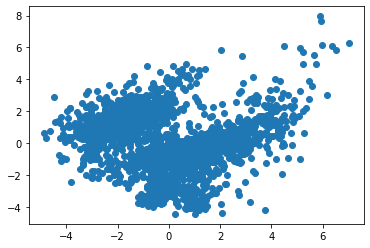

In [34]:
data_dr = pca.transform(scaled_data)
plt.scatter(data_dr[:,0], data_dr[:,1])

#### Kmeans Clustering

#### Model Performance using Silhouette coefficient and Silhouette plot

In [35]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import silhouette_visualizer

# testing Silhouetter Score for PCA transformed data
for x in range(2,15):
  kmeans = KMeans(n_clusters=x)
  kmeans.fit(data_dr)
  cluster_kmeans = kmeans.predict(data_dr)
  silhouetteScore = silhouette_score(data_dr, cluster_kmeans, metric='euclidean')
  print('Silhouetter Score of', x, 'clusters:', silhouetteScore)

ImportError: cannot import name 'safe_indexing' from 'sklearn.utils' (/Users/shirley/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/__init__.py)

In [36]:
# Silhouetter plot for PCA transformed data
kmeans = KMeans(n_clusters=2)
silhouette_visualizer(kmeans, data_dr, colors='yellowbrick')

NameError: name 'silhouette_visualizer' is not defined